<a href="https://colab.research.google.com/github/dayaYanez/MLTSA25_DYanez/blob/main/HW6/dtw_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You will need a few unusual libraries

In [1]:
!pip install python_speech_features
!pip install PyGithub
!pip install pydub

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=173a781a9c04607543c8a60043e0f1d9c27d8217a34670357c38a8eb05bcdccc
  Stored in directory: /root/.cache/pip/wheels/37/01/19/e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 15.3 MB/s eta 0:00:00


In [2]:
#system options you will need
import sys
import os
import numpy as np
import glob as glob

import scipy.io.wavfile as wav
from python_speech_features import mfcc
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from scipy.spatial.distance import cdist, euclidean
from scipy.spatial import distance_matrix

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
np.set_printoptions(threshold=sys.maxsize)
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [8]:
cd /content/gdrive/My\ Drive/MLTSA25/HW5/data/


/content/gdrive/My Drive/MLTSA25/HW5/data


In [9]:
ls

Jarvisd_template.wav    Tofftl_template.wav.3   Tontte_template.wav.6
Jarvisd_template.wav.1  Tofftl_template.wav.4   Tontth_template.wav
Jarvisd_template.wav.2  Tofftl_template.wav.5   Tontth_template.wav.1
Jarvisd_template.wav.3  Tofftl_template.wav.6   Tontth_template.wav.2
Jarvisd_template.wav.4  Tofftlu_template.wav    Tontth_template.wav.3
Jarvisd_template.wav.5  Tofftlu_template.wav.1  Tontth_template.wav.4
Jarvisd_template.wav.6  Tofftlu_template.wav.2  Tontth_template.wav.5
Jarvise_template.wav    Tofftlu_template.wav.3  Tontth_template.wav.6
Jarvise_template.wav.1  Tofftlu_template.wav.4  Tontt_template.wav
Jarvise_template.wav.2  Tofftlu_template.wav.5  Tontt_template.wav.1
Jarvise_template.wav.3  Tofftlu_template.wav.6  Tontt_template.wav.2
Jarvise_template.wav.4  Tontld_template.wav     Tontt_template.wav.3
Jarvise_template.wav.5  Tontld_template.wav.1   Tontt_template.wav.4
Jarvise_template.wav.6  Tontld_template.wav.2   Tontt_template.wav.5
Jarvish_template.wav    Tontld

# I am going to download data from someone's github repo
One of you asked me earlier in the semester how one would so this. We will use data from Salika Dave, a student at Mumbai tech who stored some soundbites on her GitHub repo.

In [10]:
from github import Github
# First create a Github instance:
# we do not need to use username and password because we will access a public repo
g = Github()



In [11]:
guser = g.get_user("salik-a")
repo = guser.get_repo("Speech_Recognition")


In [12]:
wavfiles = repo.get_contents("voices")
#.repos_url#("Speech_Recognition")
wavfiles

[ContentFile(path="voices/Jarvis_template.wav"),
 ContentFile(path="voices/Jarvisd_template.wav"),
 ContentFile(path="voices/Jarvise_template.wav"),
 ContentFile(path="voices/Jarvish_template.wav"),
 ContentFile(path="voices/Jarvisu_template.wav"),
 ContentFile(path="voices/Tofftl_template.wav"),
 ContentFile(path="voices/Tofftld_template.wav"),
 ContentFile(path="voices/Tofftle_template.wav"),
 ContentFile(path="voices/Tofftlh_template.wav"),
 ContentFile(path="voices/Tofftlu_template.wav"),
 ContentFile(path="voices/Tontl_template.wav"),
 ContentFile(path="voices/Tontld_template.wav"),
 ContentFile(path="voices/Tontle_template.wav"),
 ContentFile(path="voices/Tontlh_template.wav"),
 ContentFile(path="voices/Tontlu_template.wav"),
 ContentFile(path="voices/Tontt_template.wav"),
 ContentFile(path="voices/Tonttd_template.wav"),
 ContentFile(path="voices/Tontte_template.wav"),
 ContentFile(path="voices/Tontth_template.wav"),
 ContentFile(path="voices/Tonttu_template.wav"),
 ContentFile(p

In [13]:
path = "https://raw.githubusercontent.com/salik-a/Speech_Recognition/master/"
for f in wavfiles:
    cmd = "wget " + "%s/%s"%(path,f.path)
    os.system(cmd)

In [14]:
%ls

Jarvisd_template.wav    Tofftl_template.wav.3   Tontte_template.wav.6
Jarvisd_template.wav.1  Tofftl_template.wav.4   Tontte_template.wav.7
Jarvisd_template.wav.2  Tofftl_template.wav.5   Tontth_template.wav
Jarvisd_template.wav.3  Tofftl_template.wav.6   Tontth_template.wav.1
Jarvisd_template.wav.4  Tofftl_template.wav.7   Tontth_template.wav.2
Jarvisd_template.wav.5  Tofftlu_template.wav    Tontth_template.wav.3
Jarvisd_template.wav.6  Tofftlu_template.wav.1  Tontth_template.wav.4
Jarvisd_template.wav.7  Tofftlu_template.wav.2  Tontth_template.wav.5
Jarvise_template.wav    Tofftlu_template.wav.3  Tontth_template.wav.6
Jarvise_template.wav.1  Tofftlu_template.wav.4  Tontth_template.wav.7
Jarvise_template.wav.2  Tofftlu_template.wav.5  Tontt_template.wav
Jarvise_template.wav.3  Tofftlu_template.wav.6  Tontt_template.wav.1
Jarvise_template.wav.4  Tofftlu_template.wav.7  Tontt_template.wav.2
Jarvise_template.wav.5  Tontld_template.wav     Tontt_template.wav.3
Jarvise_template.wav.6  Tont

In [15]:
cd ../

/content/gdrive/My Drive/MLTSA25/HW5


In [16]:
filenames = np.sort(glob.glob("data/*wav"))
norm_obj= Normalize(vmin=0, vmax=4)
colors = {"Jarvis": (pl.cm.viridis(norm_obj(0)),
                     "Jarvis"),
         "Tofftl": (pl.cm.viridis(norm_obj(1)),
                    "Turn off the lights"),
         "Tontl": (pl.cm.viridis(norm_obj(2)),
                   "Turn on the lights"),
         "Tontt": (pl.cm.viridis(norm_obj(3)),
                   "Turn on the TV"),
         "Ttat": (pl.cm.viridis(norm_obj(4)),
                  "Turn the air temperature")}
y = np.array([[k for k,v in colors.items() for i in range(5)]])[0]
y

array(['Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Tofftl',
       'Tofftl', 'Tofftl', 'Tofftl', 'Tofftl', 'Tontl', 'Tontl', 'Tontl',
       'Tontl', 'Tontl', 'Tontt', 'Tontt', 'Tontt', 'Tontt', 'Tontt',
       'Ttat', 'Ttat', 'Ttat', 'Ttat', 'Ttat'], dtype='<U6')

In [17]:
for k,v in colors.items():
        print(k,v)

Jarvis ((np.float64(0.267004), np.float64(0.004874), np.float64(0.329415), np.float64(1.0)), 'Jarvis')
Tofftl ((np.float64(0.229739), np.float64(0.322361), np.float64(0.545706), np.float64(1.0)), 'Turn off the lights')
Tontl ((np.float64(0.127568), np.float64(0.566949), np.float64(0.550556), np.float64(1.0)), 'Turn on the lights')
Tontt ((np.float64(0.369214), np.float64(0.788888), np.float64(0.382914), np.float64(1.0)), 'Turn on the TV')
Ttat ((np.float64(0.993248), np.float64(0.906157), np.float64(0.143936), np.float64(1.0)), 'Turn the air temperature')


#Data Exploration and Visualization
## plot the sound bites
the sound bites are read in as numpy array by the ```scipy.io.wavfile``` module. The dataset is comprised of 5 soundbites for each of 5 sentences. The word "Jarvis", the sentences "Turn off the lights", "Turn on the lights", "Turn on the TV", and "Turn the air temperature". Each sound bite, for each sentence, is read by a different person, with different accents, genders, and background noise. if you install the pydub  module and run the notebook locally you can hear each soundbite in this loop (wont play on google colab).

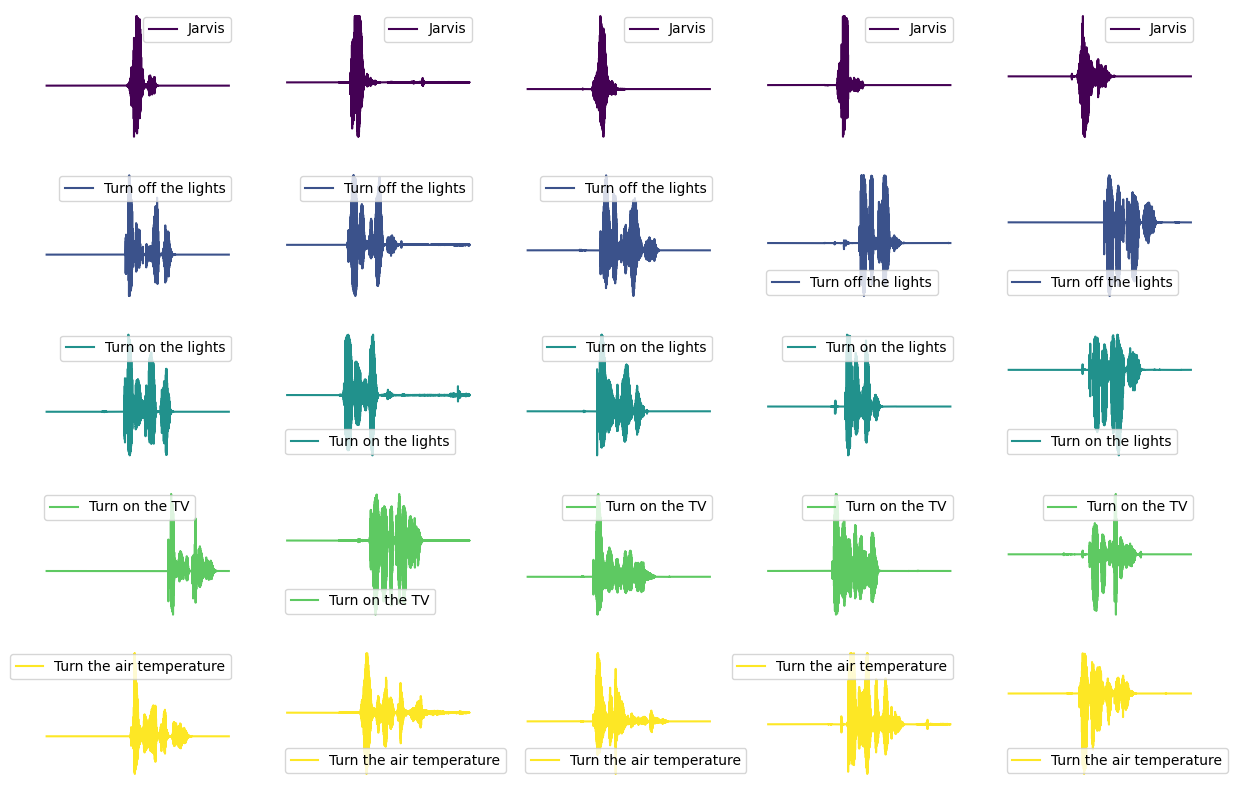

In [18]:
fig = pl.figure(figsize(15, 10))
wavfiles = []
from pydub import AudioSegment
from pydub.playback import play
for i,f in enumerate(filenames):
    ax = fig.add_subplot(5,5,i+1)
    phrase = AudioSegment.from_wav(f)
    play(phrase)
    wavfiles.append(wav.read(f))
    for k,v in colors.items():
        if k in f:
            color = colors[k][0]
            label = colors[k][1]
    ax.plot(wavfiles[-1][1], label=label, color=color)
    ax.axis('off')
    pl.legend()

Figure 1: 25 sound bites read in as arrays from the original *.wav* file. The arrays represnet sound intensity *vs* time, but the spectral sound information (frequency) is lost.  These are therefore simplified representations of the original data.
Each of 5 sentences is recorded as spoken by a different person in a different environment: the word "Jarvis", the sentences "Turn off the lights", "Turn on the lights", "Turn on the TV", and "Turn the air temperature".  In the above plot, each row is a different sentence (also plotted with a different color). The content of the soundbite is written on top of the wave plot.  At a glance, the soundbites show some similarities within the same sentence, mostly in the duration of the speech. We also note that the starting point of the speech is not homogeneous within the recorded segment.

The following analysis could be implemented in the full spectral-features dataset, but the current 1-dimensional representation of the data alows for a simpler implementation of the methods.

In [19]:
wavfiles = np.array([w[1] for w in wavfiles])
print ("the size of the full data set is :", wavfiles.shape)

the size of the full data set is : (25, 64000)


## downsampling the large arrays
each sound bit is stored in an array of 64000 elements. To work effectively we will downsample them by a factor of 10. Occasionally I will downsample it further.

Since classifying these sound mites will require generating distance arrays, we want to know ahead of time what we are getting ourelves into. We are working with foating point numbers
- 64 bits per number
We want to build 2D arrays that are NxN sized where N is the length of the soundbite array (64,000)
- 64000x64000
- 1 GB is 8e9 bit
## *task 1: Print out the amount of memory in Gigabytes (or Megabytes where needed) that would take to create a single distance matrix, a distance matrix subsampling the array by 10, by 8, and by 100*

In [20]:
print("calculating a distance matrix for the full files would requires " +
      f"{wavfiles[0].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " +
      f"{wavfiles[0][::8].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " +
      f"{wavfiles[0][::10].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 100 requires " +
      f"{wavfiles[0][::100].shape[0]**2*64/8e6} MB of memory")

calculating a distance matrix for the full files would requires 32.768 GB of memory
subsampling by a factor 10 requires 0.512 GB of memory
subsampling by a factor 10 requires 0.32768 GB of memory
subsampling by a factor 100 requires 3.2768 MB of memory


In [21]:
steps = 10

In [22]:
X = preprocessing.scale(wavfiles[:,::steps], axis=1)

In [23]:
X.shape, X.std(axis=1)

((25, 6400),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]))

inspect the sound bites: the original array and the downsampled, normalized ones.

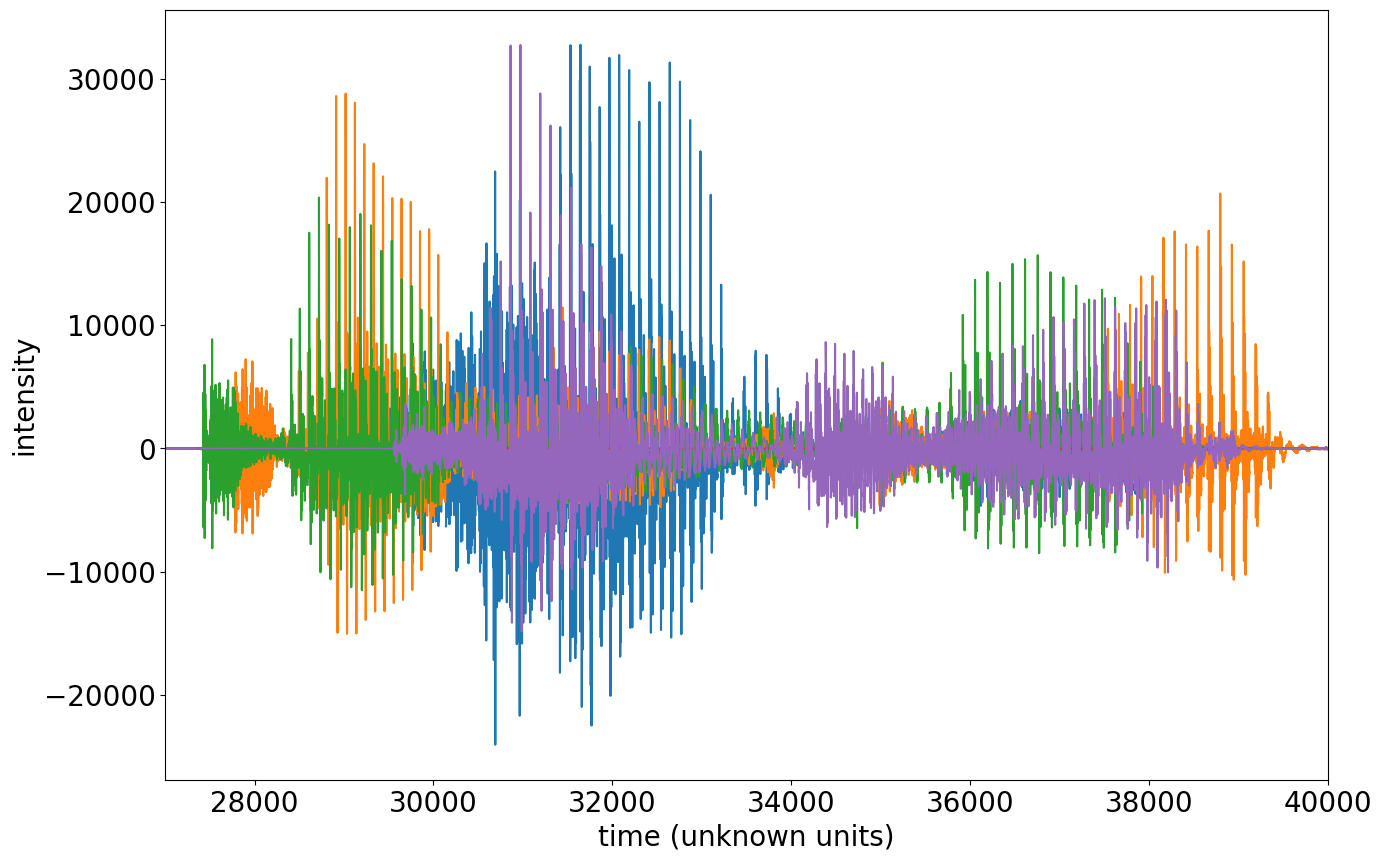

In [24]:
pl.rcParams['font.size'] = 20
pl.plot(wavfiles[0])
pl.plot(wavfiles[5])
pl.plot(wavfiles[10])
pl.plot(wavfiles[15])
pl.plot(wavfiles[20])
pl.xlim(27000, 40000)
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("intensity", fontsize=20);

Figure 2: the first sound bite for each sentene, the core portion of the array only is shown, elements 27000-40000 of 64000.


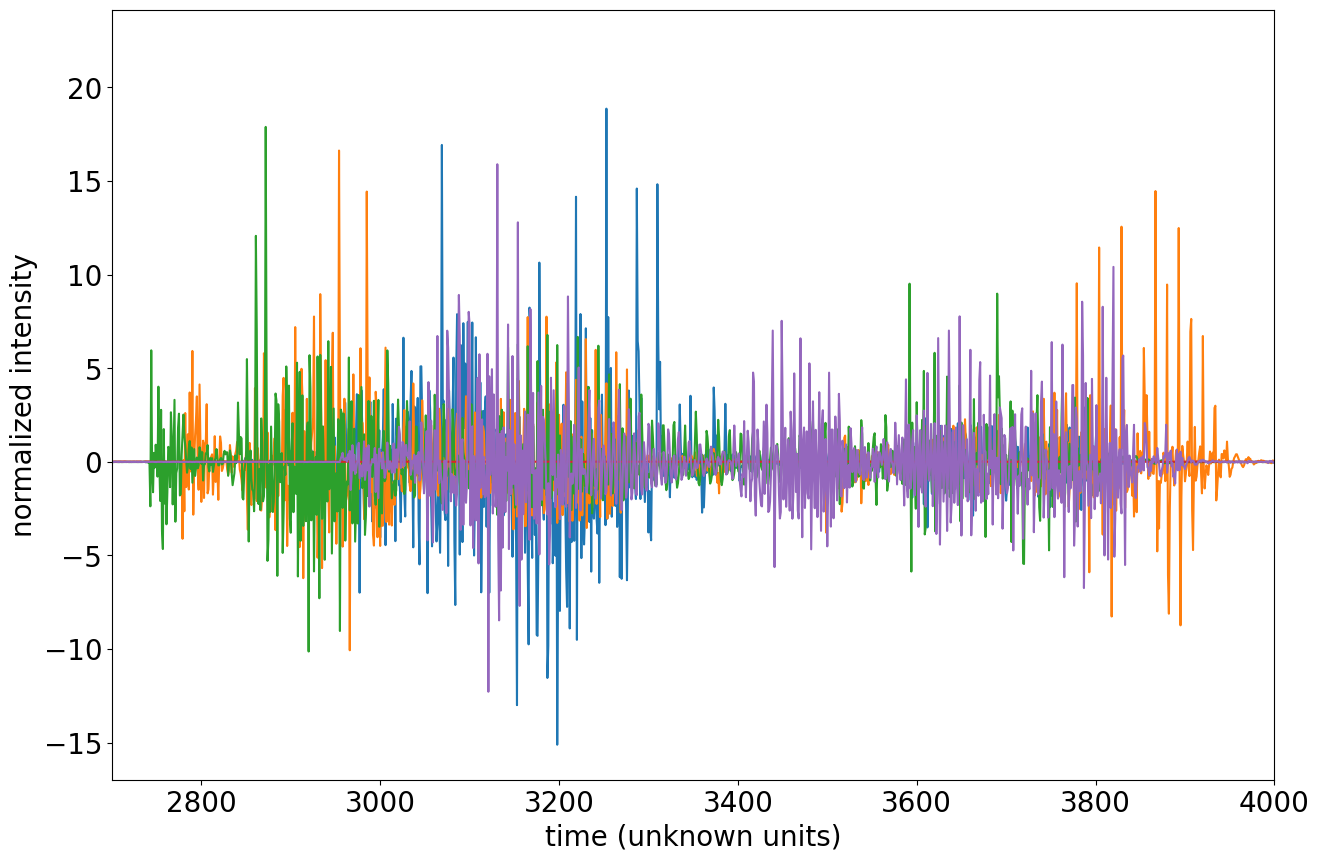

In [25]:
pl.rcParams['font.size'] = 20
pl.plot(X[0])
pl.plot(X[5])
pl.plot(X[10])
pl.plot(X[15])
pl.plot(X[20])
pl.xlim(2700, 4000)
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("normalized intensity", fontsize=20);

Figure 3: Same as figure 2 but for the standardized arrays, downsampled by a factor 10 by selecting every 10th datum.

# Calculating distance between sound bites
# Naive distsances between two arrays
Plot the distance between each pair of the 25 sound bites. The distance matrix should be 25x25 and each entry should be a naive distance calculated between the 2 arrays.

The naive distance can be the sum of the difference between entries of the array at the same time stamp, i.e. along the diagonal, or its absolute value, which would correspond to the L1 metric

In [26]:
def naive_distances(a, b):
    return (a - b).sum()
def l1(a, b):
    return (np.abs(a - b)).sum()

to save time I am resampling again by the same step. This is equivalent to resampling by 100

## *task 1: explain the figures*

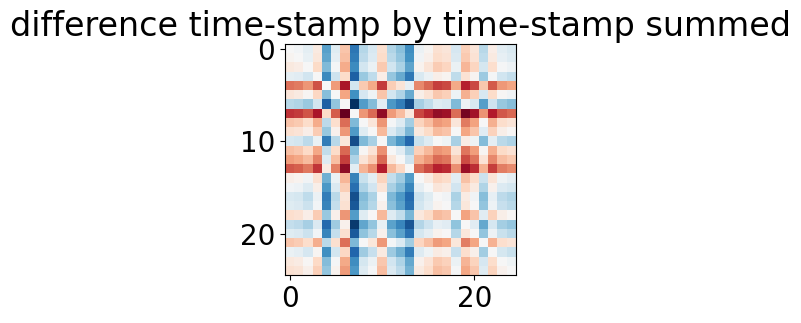

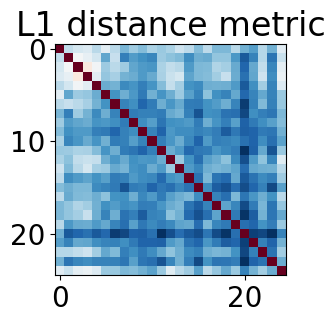

In [46]:
pl.imshow(cdist(X[:,::steps],
               X[:,::steps], metric=naive_distances),
         cmap="RdBu")
pl.title("difference time-stamp by time-stamp summed")
pl.figure()
pl.imshow(cdist(X[:,::steps],
               X[:,::steps], metric=l1),
         cmap="RdBu")
pl.title("L1 distance metric");


**Figure 3:** a) composite temporal difference matrix calculated with the naive_distances metric. In order to show temporal resemblance or divergence, each element (i, j) in the square matrix indicates the sum of the absolute differences between timestamps i and j across all time series. On a normalized or mean-centered scale, blue blocks indicate high negative differences while red blocks indicate high positive differences.
b)The L1 (Manhattan) distance metric was used to calculate the pairwise temporal similarity matrix. The L1 distance between the latent space vectors at timestamps i and j, which measures their dissimilarity, is represented by each item (i, j). At 0 (dark red), the diagonal values show perfect self-similarity. Greater dissimilarity is shown by blue values that are darker off the diagonal.

# Pairwise time-stamps distance: each time series is a vector, so we can look at the timestamp-to-timestamp distance matrix

This is the object whose diagonal you summed over to get the naive distances and the L1 distances above.
For the full sample array this should be a 64000x64000 array. It is ok to calculate the distance and plot the stanradrized arrays, further downsampled by 10 (640x640 array)

use ```scipy.spatial.distance.cdist()``` and the L1 metric that was created earlier

## *task 2 comment on the following 2 figures*

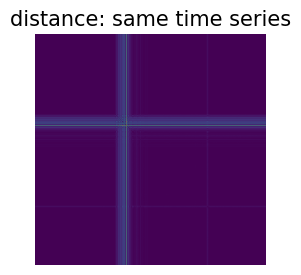

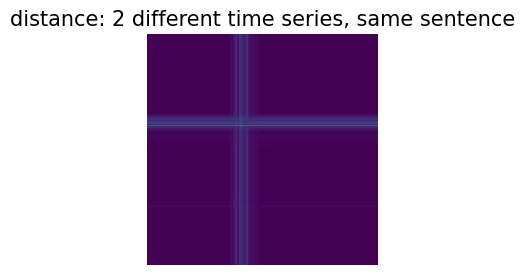

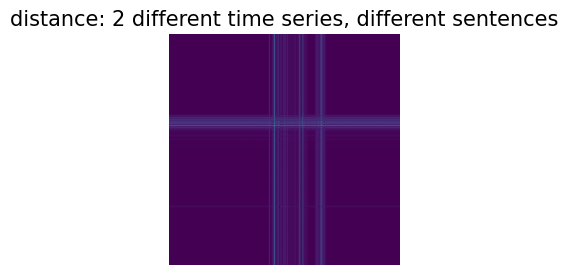

In [47]:
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[1][::steps]).T,
      metric=l1))
pl.title("distance: same time series", fontsize=15)
pl.axis('off')
pl.figure()
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[2][::steps]).T,
      metric=l1))
pl.title("distance: 2 different time series, same sentence", fontsize=15);
pl.axis('off')
pl.figure()
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[10][::steps]).T,
      metric=l1))
pl.title("distance: 2 different time series, different sentences",
         fontsize=15);
pl.axis('off');


**Figure 4:** a)Time-stamped vectors inside a single time series (indexed at X[1]) are used to generate the intra-series L1 distance matrix (	X[1] vs X[1]). Downsampled time increments from the same series are shown on each axis. The pairwise L1 (Manhattan) distances between these time-stamped vectors are indicated by the matrix entries. Perfect self-similarity is reflected in the diagonal's zero distance. Static or recurring patterns are indicated by vertical and horizontal streaks.
b) In the matrix, time-aligned vectors from two distinct feature channels (	X[1] vs X[2]) are quantified pairwise (probably using a standard metric like L1).
c)  In contrast to intra-sentence comparisons (X[1] vs X[10]), the diagonal shows weaker contrast and the matrix lacks pronounced structural patterns, indicating reduced temporal alignment.

because it is very hard to tell whatis going on in the plots above let's replot with the color in logscale

<ipython-input-48-13fb4441c066>:1: RuntimeWarning: divide by zero encountered in log10
  pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,


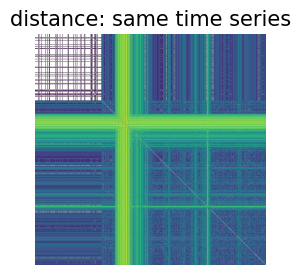

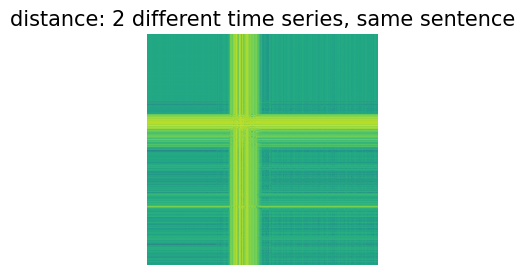

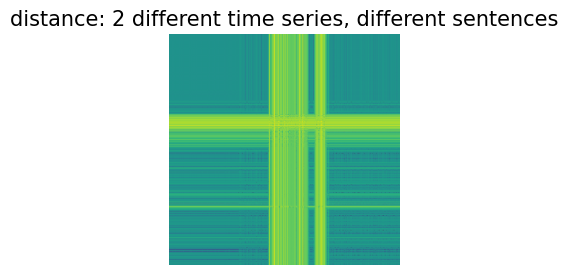

In [48]:
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[1][::steps]).T,
      metric=l1)))
pl.title("distance: same time series", fontsize=15)
pl.axis('off')
pl.figure()
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[2][::steps]).T,
      metric=l1)))
pl.title("distance: 2 different time series, same sentence", fontsize=15);
pl.axis('off')
pl.figure()
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T,
                np.atleast_2d(X[10][::steps]).T,
      metric=l1)))
pl.title("distance: 2 different time series, different sentences",
         fontsize=15);
pl.axis('off');


**Figure 5:** Time series of spoken words under three different situations are compared using log-scaled L1 distance matrices. To improve contrast and show fine-grained temporal structure, all matrices show pairwise L1 (Manhattan) distances between time-stamped latent vectors, which are displayed in log₁₀ scale. Lighter hues indicate growing dissimilarity, whereas blue indicates small distances (high similarity).
A time series is compared to itself using the **Top – Same Time Series (X[1] vs. X[1])** matrix. Perfect self-similarity is indicated by the conspicuous white diagonal (log₁₀(0) → −∞, visually truncated). Bright bands that repeat vertically and horizontally indicate substantial redundancy and recurrent temporal patterns in the data, which most likely relate to repeated phrases or consistent background noise. The logarithmic scale makes these patterns easier to see.
**Middle: X[1] vs. X[2]:** Same Sentence, Different Channels Two separate time series that reflect the same spoken sentence but are obtained from various feature channels (such as pitch vs. energy) are compared in this matrix. Strong temporal alignment and modality correlation are shown by structured diagonal and off-diagonal bands, especially yellow-green areas. Compared to the top figure, the banding is wider and more diffuse, emphasizing minute differences brought about by various signal interpretations.
**Bottom (X[1] vs. X[10]):** Time series from two distinct sentences are compared in this matrix. Limited temporal overlap and more structural divergence are reflected in the increasing occurrence of dark patches and the lack of strong diagonal alignment. Although there are occasional bright vertical bands that could represent short, acoustically comparable sound segments, the plot demonstrates the uniqueness of different utterances generally.

## Computing the distance between all pixel pairs is also prohibitively slow. Do doit I further resampled the array by another factor of 10

<ipython-input-30-258e74e94c27>:7: RuntimeWarning: divide by zero encountered in log10
  pl.imshow(np.log10(cdist(np.atleast_2d(X[i][::restep]).T,


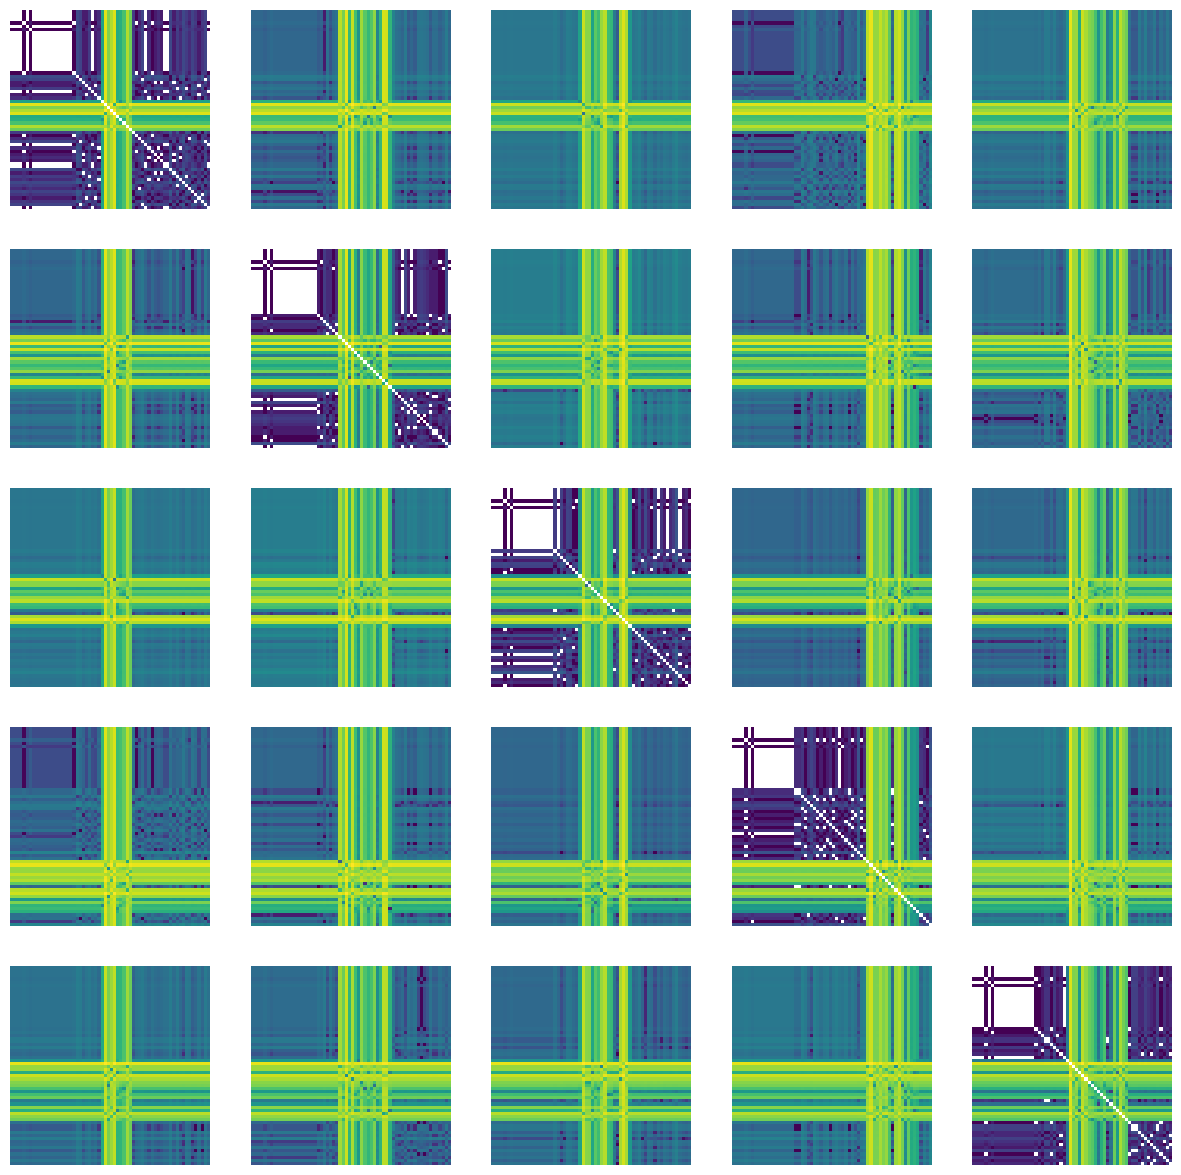

In [30]:
restep = 100
fig = pl.figure(figsize(15, 15))

for i in range(0,25,5):
    for k, j in enumerate(range(0,25,5)):
        ax = fig.add_subplot(5,5,i + k + 1)
        pl.imshow(np.log10(cdist(np.atleast_2d(X[i][::restep]).T,
                np.atleast_2d(X[j][::restep]).T,
          metric=(lambda x,y: np.abs(x - y)))))
        pl.axis('off');

**Figure 6** Pairwise temporal similarity across several time series is captured via a grid of log-scaled L1 distance matrices. To highlight coarse-grained structural features, each subplot (i, j) represents the L1 distance matrix between two time series indexed from 0 to 24 in increments of 5 and downsampled with a step size of 100 (restep = 100). The base-10 logarithm of L1 distances is represented by the color scale, with dark purple areas denoting large distances (temporal dissimilarity) and brilliant yellow areas denoting low distances (strong temporal alignment). Expected self-similarity is shown by diagonal subplots (i = j), which appear as vivid diagonals. Diverse temporal dynamics are reflected in the patterns' fluctuation between off-diagonal subplots, which may be caused by variations in phonetic, prosodic, or semantic traits.

# DTW distance
The DTW algorithm calculates the distance as the sum along a path in the  pair-wise distance matrix that minimized the distance between points, at the cost of increasing the length of the path. The simple Euclidean distance between 2 matrices would be the sum along the diagonal. In DTW this sum is modified to be the sum over the elements as follows:


$DTW(Q_i, C_j) = d(Q_i, C_j) + min(d(Q_{i-1}, C_{j-1}), d(Q_{i-1}, C_j), d(Q_i, C_{j-1})) $
Where $d$ is the distance between 2 time stamps: e.g. the absolute value of thedifference (L1)

The algorithm has the following rules:

- Every index from the first sequence must be matched with one or more indices from the other sequence and vice versa
- The first index from the first sequence must be matched with the first index from the other sequence (but it does not have to be its only match)
- The last index from the first sequence must be matched with the last index from the other sequence (but it does not have to be its only match)
- The mapping of the indices from the first sequence to indices from the other sequence must be monotonically increasing, and vice versa, i.e. if j > i are indices from the first sequence, then there must not be two indices l > k in the other sequence, such that index i is matched with index l and index j is matched with index k , and vice versa

Remember that you will need to start with the L1 distance: at every step you will need to know the L1 distance for several surrounding cells. While you could calculate it on the spot it is more computationally efficient in python to calculate it for the whole array at once, as long as you can store the whole array in memory. Solving this with "dynamic coding", you can calculate all pair-wise distances first, storing the distance matrix, then find the path along the matrix and calculating the DTW distance by looking up values of the relevant cells. Pairwise L1 distance can be caluclated for the entire matrix with ```scipy.spatial.distance.cdist```

With that in mind, create a function that given x and y, two np.arrays of n and m elements respectively, returns
 - the DTW distance
 - the DTW distance matrix
 - the path along the matrix as x-y indices (look in the slides if you need help with this one: I added the code in there)

Make sure your function called *dtw()* and make sure that it has a "docstring' that complies to PEP conventions https://www.python.org/dev/peps/pep-0257/



Run your function for the soundbite arrays using every 100th datapoint and plot the array and the path along the array
 - for the first normalized sound array matched with itself
 - for the first normalized sound array matched with another normalized sound array of the same phrase:  soundbites are the same sentence 5 by 5: 0-4 same sentence, 5-9, 10-14, 15-19, 19-20
 - for the first unnormalized sound array matched with another unnormalized sound array, the same one as in the previous step
 - any two other normalized arrays, not the same sentence.

What is the path for the first array you plotted? Why?

## *task 3: write on your own the DTW algorithm. Use the rules above and the pseudocode and equations in the slides*

## *Extra Credit: code the DTW with a parameter r tha allows to search farther than one step away from the diagonal. Make that r an input to your dtw() function*

In [31]:

def path(DTWm):
  # the path can be calculated backword or forward
  # I find bacward more intuitive
  # start at one to the last cell:
  i, j = np.array(DTWm.shape) - 2

  #since I do not know how long the path is i will use lists
  # p and q will be the list of indices of the path element along the 2 array axes
  p, q = [i], [j]
  # go all the way to cell 0,0
  while (i > 0) or (j > 0):
      	# pick minimum of 3 surrounding elements:
      	# the diagonal and the 2 surrounding it
        tb = argmin((DTWm[i, j], DTWm[i, j+1], DTWm[i+1, j]))
        #stay on the diagonal
        if tb == 0:
            i -= 1
            j -= 1
        #off diagonal choices: move only up or sideways
        elif tb == 1:
            i -= 1
        else:  # (tb == 2):
            j -= 1
        # put i and the j indexx into p and q pushing existing entries forward
        p.insert(0, i)
        q.insert(0, j)
  return array(p), array(q)



## code steps:
- Calculate the distance matrix according to L1
- Set the 0,0 cell to 0
- for all values of the index i; for all values of the index j

  set the DTW[i,j] cell to $L1 + min(l1(Q_{i-1}, C_{j-1}), L1(Q_{i-1}, C_j), L1(Q_i, C_{j-1}))$

- calculate the DTW path
- return the value of the last cell (DTW[-1,-1])  the DTW array, the path

note: you will likely have to have a nested loop but there are extra points if yuo can figure out how to write it without a nested loop (for i...: for j....:)

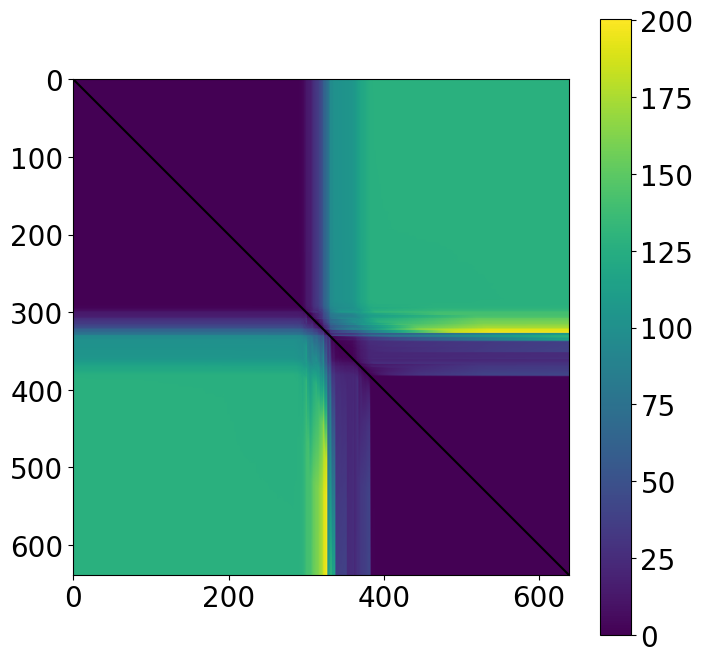

dtw distance:  0.0


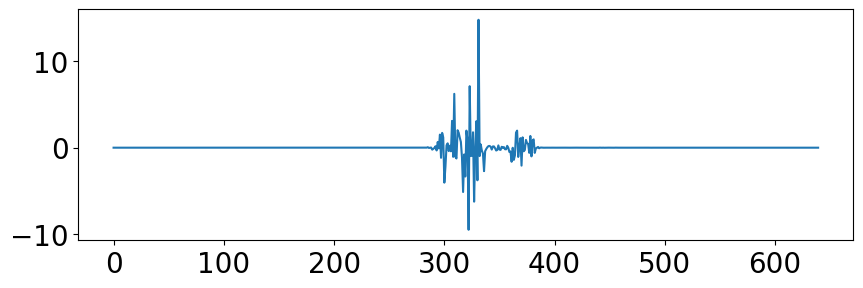

In [32]:
# shown in slack, current code block

restep = 10

def dtw(x, y, show=False, getpath=True, r=1):
    """
    Returns a DTW matrix along with (optionally) returning a path through the matrix using the "path" function
    Inputs:
     - x (array or list): x values of elements n
     - y (array or list): y values of elements m, corresponding to x values
     - show (boolean): show or not show colormap of final DTW computed array
     - getpath (boolean): obtain values of the path calculated along the matrix

    Outputs (if getpath == True):
     - A list of (final DTW array matrix [numpy array], final DTW matrix [numpy array], values of the path indices in (p, q) [floats])

    Outputs (if getpath == False):
     - final DTW array matrix [numpy array]
    """

    x = np.array(x)
    y = np.array(y)

    D = cdist(x[:, None], y[:, None], metric='cityblock')

    N, M = D.shape
    DTW = np.full((N, M), np.inf)
    #DTW[0, 0] = 0
    DTW[0, 0] = D[0, 0]
    p, q = None, None

    # skip element [0, 0] since we already set the value
    for i in range(1, N):
        for j in range(1, M):
            DTW[i, j] = D[i, j] + np.min((
                DTW[i - 1, j],
                DTW[i, j - 1],
                DTW[i - 1, j - 1]
            ))

    p, q = path(DTW)

    # if getpath:
        # p, q = path(DTW_final)
        # p, q = path(DTW)

    DTW_final = DTW[1:, 1:]

    if show:
        plt.figure(figsize=(8, 8))
        plt.imshow(DTW_final)
        plt.colorbar()
        if p is not None and q is not None:
            plt.plot(q, p, color='black')
        plt.show()

    if getpath:
        return DTW_final[-1, -1], DTW_final, (p, q)
    return DTW[-1, -1]


# DTW distance to itslef
print("dtw distance: ", dtw(X[0][::restep], X[0][::restep], show=True)[0]);
pl.figure(figsize(10,3))
pl.plot(X[0][::restep]);
pl.show()

**Figure 7:** **Top Panel:** Manhattan (L1) distance on downsampled data is used in a proprietary solution to construct the DTW distance matrix. The cumulative cost of aligning items x[i] and x[j] is represented by each entry (i, j). Perfect self-alignment is confirmed by the solid black diagonal, which indicates the ideal warping route. Low costs are shown by dark regions, but localized misalignment caused by signal variance is reflected by bright yellow spots, particularly those surrounding the center.
**Bottom Panel:** The same time series' downsampled waveform. In the above matrix, areas with greater DTW cost are shown by oscillatory patterns surrounding the center.

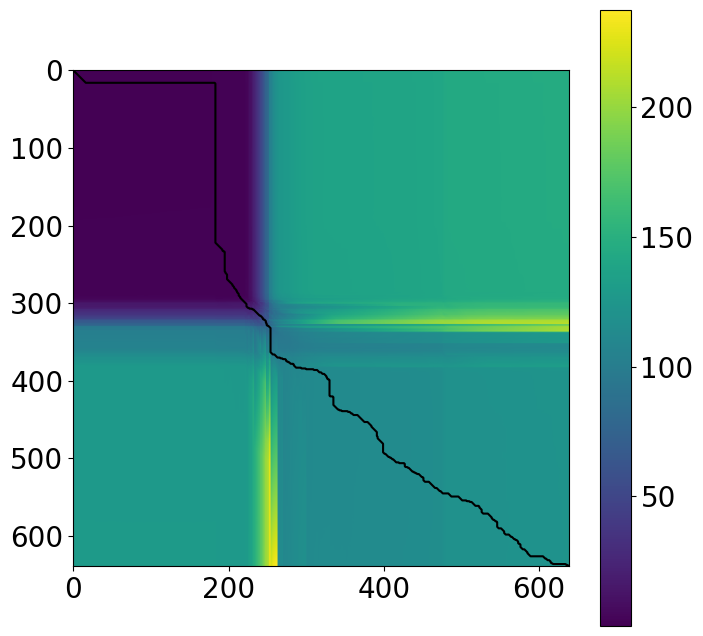

dtw distance:  121.55413980041301


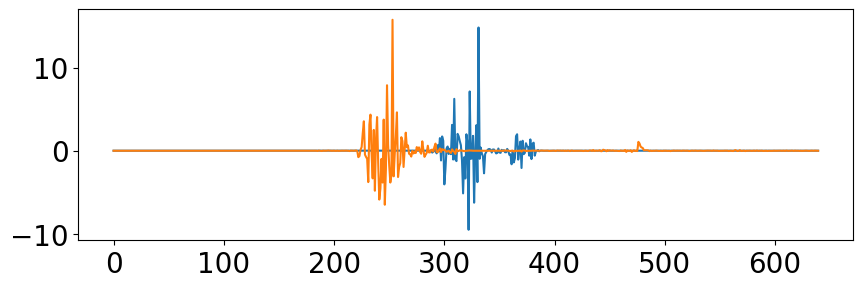

In [49]:
# DTW distance to a file with a different sound bite, normalized
print("dtw distance: ", dtw(X[0][::restep], X[1][::restep], show=True)[0])
pl.figure(figsize(10,3))
pl.plot(X[0][::restep])
pl.plot(X[1][::restep]);

**Figure 8: Top Panel:** Two normalized signals aligned by the DTW cumulative cost matrix. The lowest cumulative cost to align prefix subsequences is shown in each cell (i, j). In order to account for temporal misalignments, the black line deviates from the diagonal and follows the ideal warping route. Darker spots show great local resemblance, whereas bright yellow locations show high local prices. The signals' modest dissimilarity is shown by the overall DTW distance of 121.55.
**Bottom Panel**: The two downsampled time series (blue and orange) are superimposed. Variations in length, timing, and activation patterns emphasize the necessity of warping for alignment.

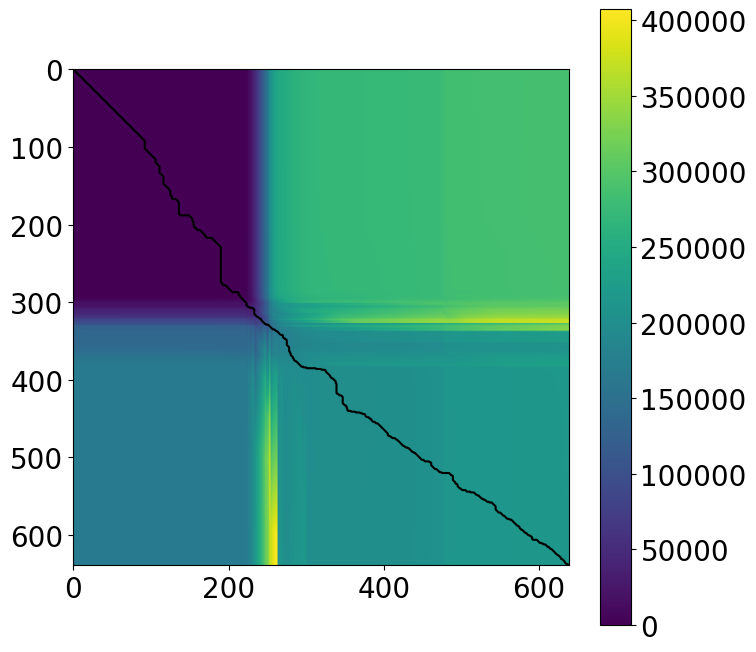

dtw distance:  216485.0


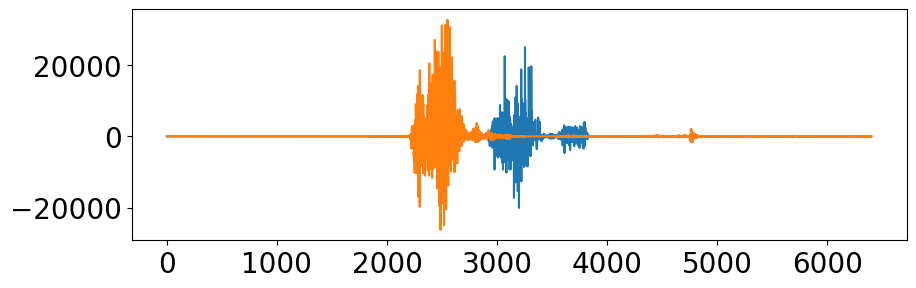

In [36]:
# DTW distance to a file with a different sound bite, normalized
print("dtw distance: ", dtw(wavfiles[0][::steps*restep], wavfiles[1][::steps*restep], show=True)[0])
pl.figure(figsize(10,3))
pl.plot(wavfiles[0][::restep])
pl.plot(wavfiles[1][::restep]);
pl.show()



**Figure 9: Top Panel:** Manhattan (L1) distance is used to calculate the DTW cumulative cost matrix, which shows the alignment costs between two speech signals. The total cost of aligning subsequences up to time points i and j is shown in each cell (i, j). The ideal warping trajectory, which deviates from the diagonal because of variations in time, structure, and duration, is depicted by the black route layered on top. High local misalignments are shown by bright yellow areas, particularly around amplitude peaks or phonetic mismatches. With an overall DTW distance of 216,485.0, significant dissimilarity and considerable alignment effort are indicated.
The raw (unnormalized) waveforms of wavfiles[0] (orange) and wavfiles[1] (blue), downsampled every 10 points, are compared in the **bottom panel.** The higher DTW cost can be explained by distinct variations in form, amplitude, and temporal structure.

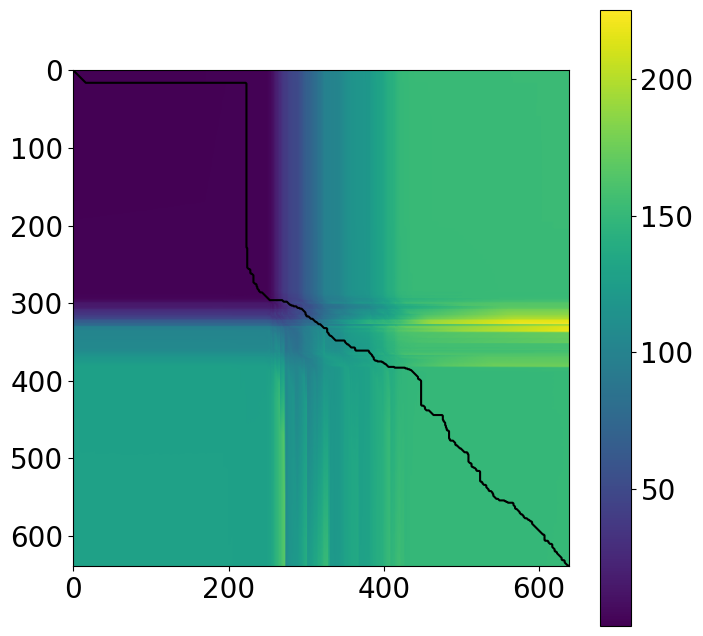

dtw distance:  150.50888976161608


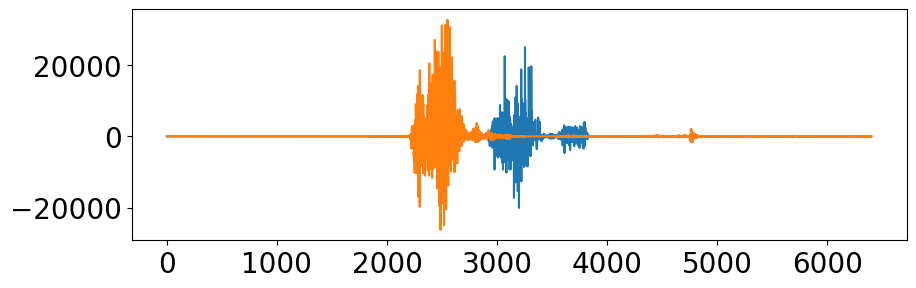

In [37]:
# DTW distance to a file with a different sound bite
print("dtw distance: ", dtw(X[0][::restep], X[24][::restep], show=True)[0])
pl.figure(figsize(10,3))
pl.plot(wavfiles[0][::restep])
pl.plot(wavfiles[1][::restep]);

**Figure 10: Top Panel:** Manhattan distance between time-aligned frames of two different unnormalized audio samples was used to calculate the DTW cumulative cost matrix. The cumulative alignment cost between sequence prefixes is displayed in each cell (i, j). The ideal warping route, which deviates from the diagonal because of structural and temporal incompatibilities, is indicated by the black line. High local costs are shown by bright yellow zones, especially in the mid-sequence. The modest dissimilarity indicated by the DTW distance of 150.51 is probably the result of comparable sound types grouped with varying time or length.
**Bottom Panel:** Raw waveform comparison between wavfiles[0] (orange) and wavfiles[1] (blue), downsampled at 10-point intervals. Variations in the DTW matrix correspond to differences in loudness, onset time, and silence patterns.

# 2 What is the nearest neighbor of the first sound bite?

In [38]:
# what is most similar to the first time series? (other than itself)
distances = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distances[i], _, _ = dtw(X[0][::restep], X[i][::restep]);


0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [39]:

distances.argsort()

array([ 0,  3,  2,  1, 24, 13,  4,  5,  8, 22, 19, 15,  6, 16, 11, 12, 18,
        7,  9, 17, 10, 14, 23, 20, 21])

In [40]:
print("Based on its nearest neighbor the first sound bite says...")
print(y[distances.argsort()[1]])

Based on its nearest neighbor the first sound bite says...
Jarvis


## *task 4: Classify the 20th sound bite based on its nearest neighor with Euclidean and DTW distance*

In [41]:
# what is most similar to the first time series? (other than itself)
distancesE = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesE[i] = euclidean(X[19], X[i]);



0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [42]:
distancesE.argsort()

array([19,  0, 11, 18,  8, 12,  6, 16,  2, 14, 22,  3, 17, 21,  1,  4, 13,
        9, 10, 15,  5, 23, 24, 20,  7])

In [43]:
print("Based on its nearest neighbor and Euclidian distance ",
      "the last sound bite says...")
print(" ")
print("Correct!") if y[distancesE.argsort()[1]] == y[19] else print("Sorry...")

Based on its nearest neighbor and Euclidian distance  the last sound bite says...
 
Sorry...


In [44]:
# what is most similar to the first time series? (other than itself)
distancesDTW = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesDTW[i] = dtw(X[19][::steps], X[i][::steps], getpath=False);

0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [45]:
print("Based on its nearest neighbor and DTW distance ",
      "the last sound bite says...")
print(y[distancesDTW.argsort()[1]])
print("Correct!") if y[distancesDTW.argsort()[1]] == y[19] else print("Sorry...")

Based on its nearest neighbor and DTW distance  the last sound bite says...
Tofftl
Sorry...
